In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/Users/rsaba/Desktop/Muesli-Project/Working_File_Ragu/Log_final_worksheet.csv')

In [8]:
df.columns

Index(['Index', 'Order ID', 'Order Date_x', 'Ship Mode_x', 'Customer ID',
       'Customer Name_x', 'Origin Channel', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Product ID',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Arrival Scan Date',
       'Customer Name_y', 'Row ID', 'Order Date_y', 'On Truck Scan Date',
       'Ship Mode_y', 'Ready to Ship Date', 'Pickup Date',
       'delivery_time_days', 'total_delivery_time_days', 'order_Month',
       'Order_YearMonth', 'order_weekday', 'on_truck_weekday',
       'warehouse_time_days'],
      dtype='object')

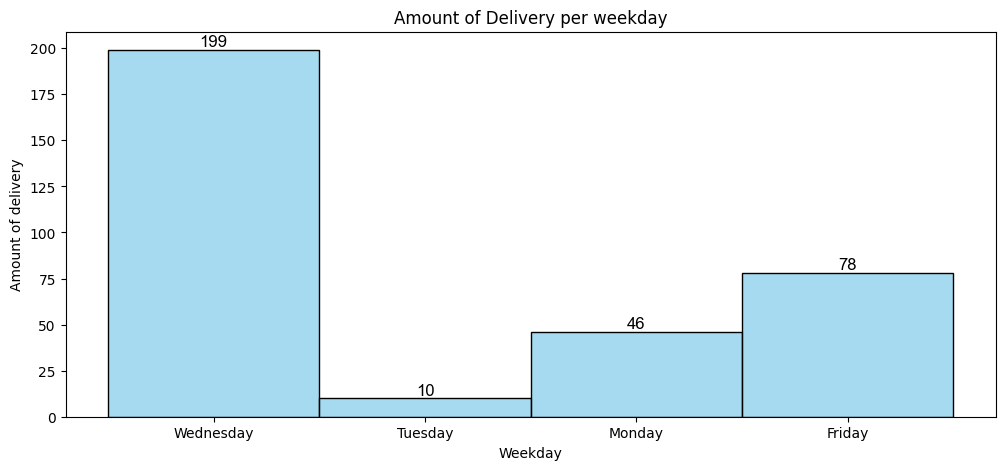

In [9]:
#Auslastung der Trucks nach Wochentag

plt.figure(figsize=(12,5))

# Histogramm der Wochentage
ax = sns.histplot(
    data=df,
    x='on_truck_weekday',
    stat='count',      # Anzahl pro Kategorie
    discrete=True,     # Kategoriale Achse
    color='skyblue'    # Balkenfarbe (kann auch palette=colors bei mehreren Kategorien)
)

# Werte über die Balken schreiben
for p in ax.patches:
    height = p.get_height()          # Höhe des Balkens
    ax.text(
        p.get_x() + p.get_width()/2, # x-Position: Mitte des Balkens
        height + 0.1,                # y-Position leicht über Balken
        f'{int(height)}',            # Wert als Text
        ha='center', va='bottom', fontsize=12, fontname="Arial"
    )

plt.title("Amount of Delivery per weekday")
plt.xlabel("Weekday")
plt.ylabel("Amount of delivery")
plt.show()

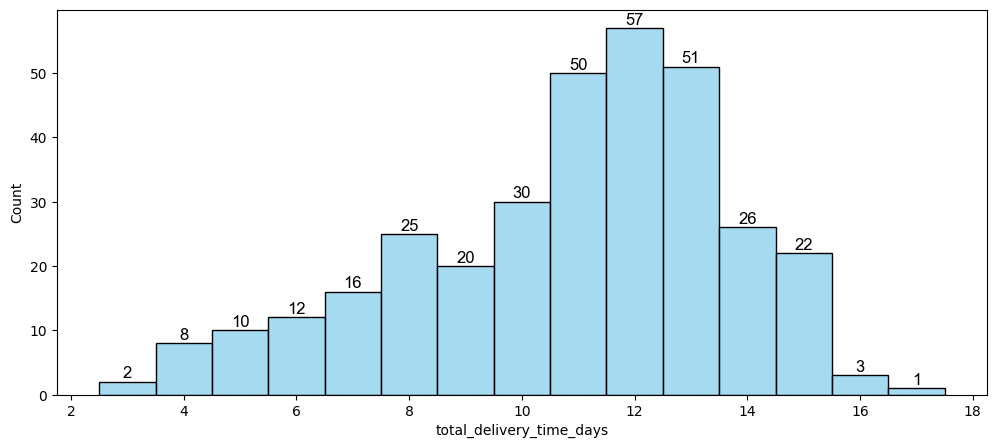

In [10]:
plt.figure(figsize=(12,5))

# Histogramm der Wochentage
ax = sns.histplot(
    data=df,
    x='total_delivery_time_days',
    stat='count',      # Anzahl pro Kategorie
    discrete=True,     # Kategoriale Achse
    color='skyblue'    # Balkenfarbe (kann auch palette=colors bei mehreren Kategorien)
)

# Werte über die Balken schreiben
for p in ax.patches:
    height = p.get_height()          # Höhe des Balkens
    ax.text(
        p.get_x() + p.get_width()/2, # x-Position: Mitte des Balkens
        height + 0.1,                # y-Position leicht über Balken
        f'{int(height)}',            # Wert als Text
        ha='center', va='bottom', fontsize=12, fontname="Arial"
    )

#plt.title("Amount of Delivery per weekday")
#plt.xlabel("Weekday")
#plt.ylabel("Amount of delivery")
plt.show()

In [11]:
df['order_Month_num'] = df['order_Month'].map({
    'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
    'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12
})

# Wochentag in Zahl (Montag=0, Sonntag=6)
df['order_weekday_num'] = df['order_weekday'].map({
    'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3,
    'Friday':4, 'Saturday':5, 'Sunday':6
})

df['on_truck_weekday_num'] = df['on_truck_weekday'].map({
    'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3,
    'Friday':4, 'Saturday':5, 'Sunday':6
})

In [12]:
corr_columns = ['logistics_time_days', 'total_delivery_time_days',
                'warehouse_time_days']

corr_mtrx = df[corr_columns].corr()
corr_mtrx

KeyError: "['logistics_time_days'] not in index"

In [ ]:
plt.figure(figsize = (7,6))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')


In [ ]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns

# Eigene Colormap: Weiß → Skyblue
sky_cmap = LinearSegmentedColormap.from_list("sky_cmap", ["white", "skyblue"])

plt.figure(figsize=(7,6))
ax = sns.heatmap(
    corr_mtrx,
    linewidths=.5,
    annot=True,
    cmap=sky_cmap
)

# Schriftart & Größe anpassen
plt.xticks(rotation=45, fontsize=12, fontname="Arial")
plt.yticks(rotation=0, fontsize=12, fontname="Arial")

plt.show()


In [16]:
df = df.rename(columns={"delivery_time_days":"logistics_time_days"})

In [ ]:

plt.figure(figsize=(12,6))



plt.plot(
    agg_df['Order_YearMonth'].astype(str), 
    agg_df['mean_delivery'], 
    marker='o', label='Mean Delivery Time',
    color='lightsalmon'   # Farbe anpassen
)

plt.plot(
    agg_df['Order_YearMonth'].astype(str), 
    agg_df['mean_warehouse'], 
    marker='s', label='Mean Warehouse Time',
    color='skyblue' # Farbe anpassen
)

plt.xlabel('Month over Month')
plt.ylabel('Average Time (days)')
#plt.title('Average Delivery & Warehouse Time per Month')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)  # dezentere Grid-Linien
plt.tight_layout()
plt.show()

In [15]:
df.columns

Index(['Index', 'Order ID', 'Order Date_x', 'Ship Mode_x', 'Customer ID',
       'Customer Name_x', 'Origin Channel', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Product ID',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Arrival Scan Date',
       'Customer Name_y', 'Row ID', 'Order Date_y', 'On Truck Scan Date',
       'Ship Mode_y', 'Ready to Ship Date', 'Pickup Date',
       'delivery_time_days', 'total_delivery_time_days', 'order_Month',
       'Order_YearMonth', 'order_weekday', 'on_truck_weekday',
       'warehouse_time_days', 'order_Month_num', 'order_weekday_num',
       'on_truck_weekday_num'],
      dtype='object')

<Axes: xlabel='Order_YearMonth', ylabel='Avg_Days'>

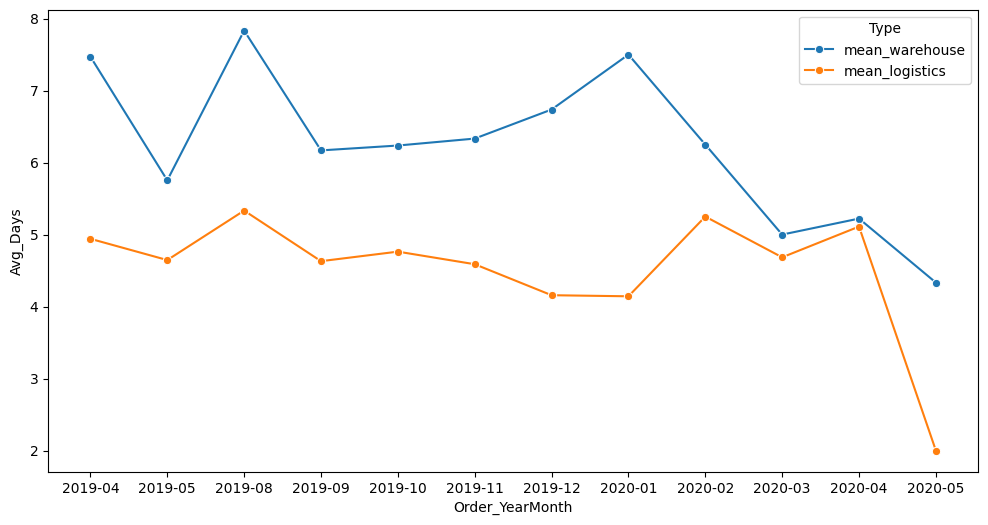

In [25]:
# 1. Aggregation nach Jahr-Monat
agg_df = df.groupby("Order_YearMonth").agg(
    mean_warehouse=("warehouse_time_days", "mean"),
    mean_logistics=("logistics_time_days", "mean")
).reset_index()

# 2. Wide → Long umwandeln für seaborn
plot_df = agg_df.melt(
    id_vars="Order_YearMonth",
    value_vars=["mean_warehouse", "mean_logistics"],
    var_name="Type", value_name="Avg_Days", 
    
    
)

# 3. Plot mit Seaborn
plt.figure(figsize=(12,6))
sns.lineplot(
    data=plot_df,
    x="Order_YearMonth", 
    y="Avg_Days", 
    hue="Type", 
    marker="o"
)

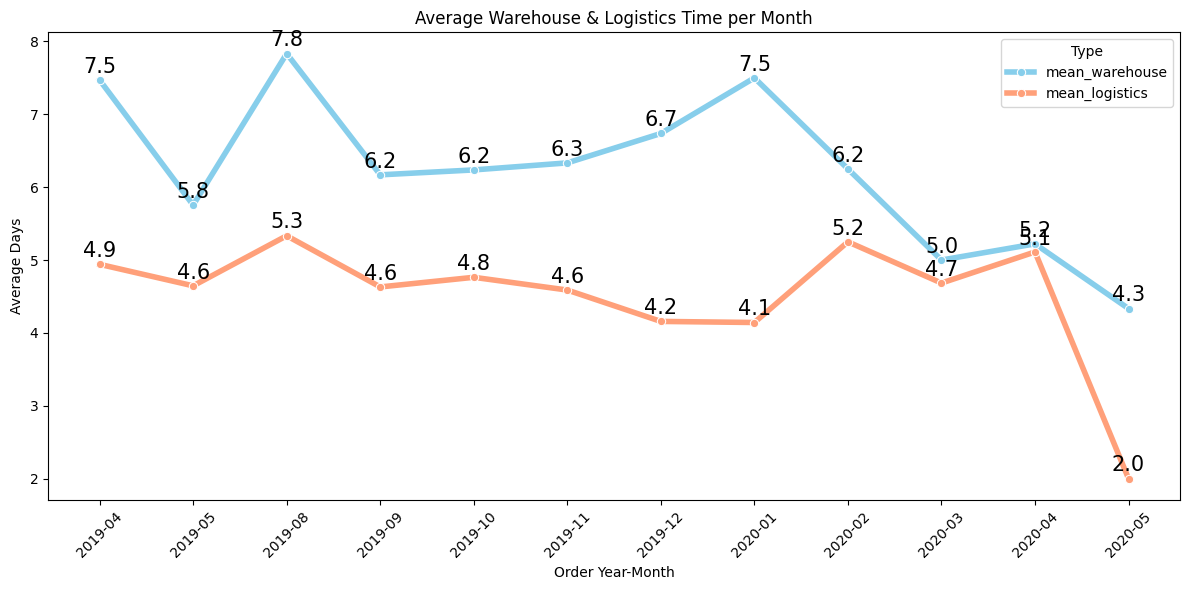

In [31]:
# Farben definieren
colors = {
    "mean_warehouse": "skyblue",
    "mean_logistics": "lightsalmon"
}

plt.figure(figsize=(12,6))

# Linienplot mit angepasster Linienstärke
sns.lineplot(
    data=plot_df,
    x="Order_YearMonth", 
    y="Avg_Days", 
    hue="Type", 
    marker="o",
    palette=colors,
    linewidth=4  # hier die Linienbreite anpassen
)

# Werte über den Datenpunkten anzeigen
for i, row in plot_df.iterrows():
    plt.text(
        x=row["Order_YearMonth"], 
        y=row["Avg_Days"] + 0.1,  # leicht oberhalb des Punktes
        s=f"{row['Avg_Days']:.1f}", 
        ha='center',
        fontsize=15
    )

plt.xlabel("Order Year-Month")
plt.ylabel("Average Days")
plt.title("Average Warehouse & Logistics Time per Month")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.tight_layout()
plt.show()